4.1 선형 회귀
--------------
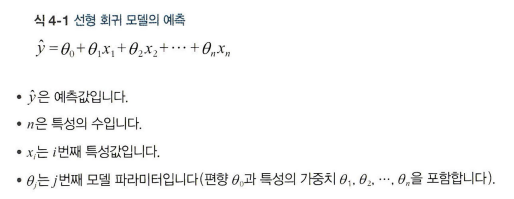

일반적인 선형 모델 : 입력 특성의 가중치 합 + 편향(절편)

훈련 데이터의 적합성 측정 지표 : RMSE (MSE가 더 간단)

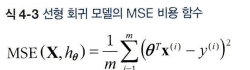

4.1.1 정규방정식
----------------------
비용함수를 최소화하는 세타값 찾기 위한 방법

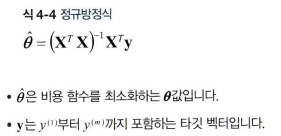

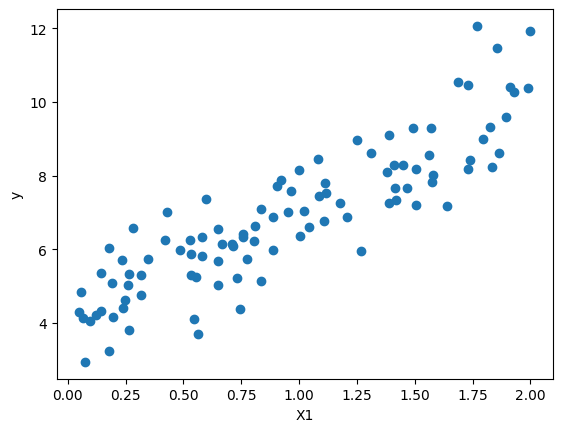

In [1]:
# 위 공식을 테스트하기 위해 선형처럼 보이는 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [2]:
# 정규방정식 사용해 세타 햇 계산
X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

inv() : 역행렬 계싼

dot() : 행렬 곱셈 계산

In [3]:
theta_best

array([[4.04490112],
       [2.99516044]])

예측한 세타값이랑 비슷하지만 정확히 재현하지는 못함

In [4]:
# theta hat 사용해 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.04490112],
       [10.03522199]])

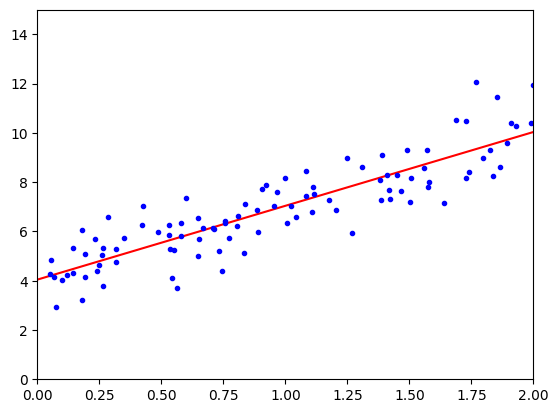

In [5]:
# 모델의 예측을 그래프에 나타내기
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# 사이킷런에서 선형회귀 수행하기
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.04490112],
       [10.03522199]])

LinearRegression 클래스는 scipy.linalg.lstsq()함수를 기반으로 함

=> 이 함수는 theta hat= (X+)*y를 계산한다. X+는 X의 유사역행렬임

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.04490112],
       [2.99516044]])

유사역행렬

- np.linalg.pinv() 함수를 사용하면 유사역행렬을 구할 수 있음
- 특잇값 분해(SVD)라 부르는 표준 행렬 분해 기법을 사용해 계산됨
- 정규방정식 계산방식보다 효율적

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.04490112],
       [2.99516044]])

4.1.2 계산 복잡도
---------------------
정규방정식은 (n+1)x(n+1) 크기가 되는 X.T * X의 역행렬을 계산함 (n: 특성수)

- 계산 복잡도는 일반적으로 일반적으로 O(n^2.4)에서 O(n^3) 사이
  - 이는 특성 수가 두배로 늘어나면 계산 시간이 대략 5.3배에서 8배로 증가함을 의미한다.

- 사이킷런의 LinearRegression 클래스가 사용하는 SVD 방법은 약 O(n^2)
  - 특성의 개수가 두 배로 늘어나면 계산 시간이 대략 4배임

=> 정규방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠름

4.2 경사 하강법(GD)
---------------------
기본 아이디어 : 비용함수를 최소화하기 위해 반복해서 파라미터 조정하기

- 세타를 임의의 값으로 시작 => 파라미터 벡터에 대해 비용 함수의 현재 gradient를 계산 => gradient가 감소하는 방향으로 진행 => gradient가 최솟값에 수렴할 때까지 점진적으로 향상시킴

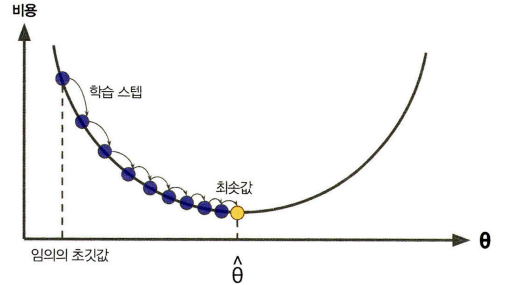

학습 스텝의 크기 : 비용함수의 기울기에 비례
  - 파라미터가 최솟값에 가까울수록 스텝의 크기가 작아짐

(1) 학습률 : 스텝의 크기

학습률이 너무 작으면 : 알고리즘이 수렴하기 위해 반복을 많이 진행해야 함
학습률이 너무 크면 : 골짜기를 가로질러 반대편으로 건너뛰게 되어 이전보다 더 높은 곳으로 갈 수도 있음

(2) 경사하강법의 문제점

알고리즘이 왼쪽에서 시작하면 전역 최솟값보다 덜 좋은 지역 최솟값에 수렴하는 문제
알고리즘이 오른쪽에서 시작하면 평탄한 지역을 지나기 위해 시간이 오래 걸리고 일찍 멈추게 되어 전역 최솟값에 도달하지 못함

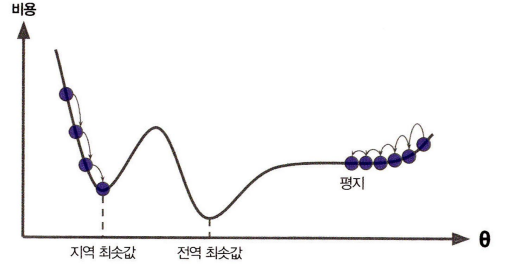

(3) 선형 회귀를 위한 MSE 비용 함수

어떤 두 점을 선택해 선을 그어도 곡선을 가로지르지 않는 볼록함수 (지역 최솟값이 없고 하나의 전역 최솟값만 존재한다는 의미)

=> 따라서, 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있음을 보장

4.2.1 배치 경사 하강법
-------------------------
경사하강법의 단점 : 각 모델 파라미터에 대해 비용 함수의 gradient를 계산해야함 (편도함수)

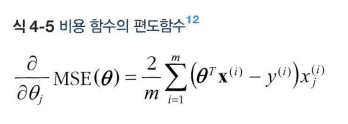

배치 경사하강법 : 매 경사 하강법 스텝에서 전체 훈련 세트 X에 대해 계산 (매 스텝에서 훈련 데이터 전체를 사용)
- 큰 훈련세트에서 느림
- 특정 수에 민감하지 않음

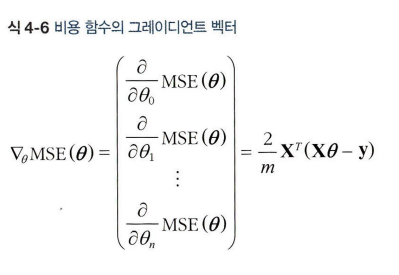

In [11]:
# 배치 경사 하강버 알고리즘 간단히 구현

eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)   # 무작위 초기화

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients

In [12]:
theta

array([[4.04490112],
       [2.99516044]])

정규방정식 계산결과와 정확히 일치함 (경사하강법 완벽작동)

학습률이 다르면 ..??

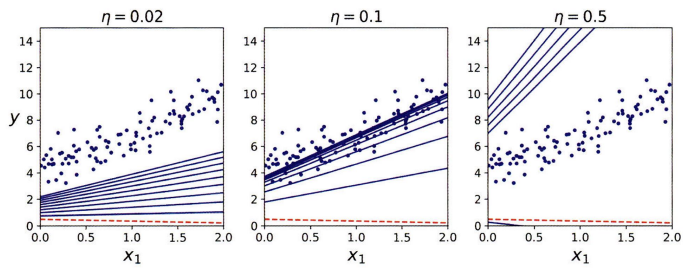

가운데가 딱 적당

적절한 학습률 찾는 법 : 그리드서치 + 반복횟수 제한(빠르게 하기 위함)

반복 횟수 제한방법 : 반복횟수 크게 지정 + 그레디언트 벡터가 아주 작아지면 알고리즘 중지

4.2.2 확률적 경사 하강법
----------------------------
매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 gradient를 계산
- 배치 경사하강법의 문제해결 (속도 빠름)
- 배치 경사하강법보다는 불안정. 위아래로 요동침

=> 학습률을 점진적으로 감소시키기 !
=> 시작할 때는 학습률을 크게하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함

학습 스케줄 : 매 반복에서 학습률을 결정하는 함수


In [13]:
# 학습 스케줄 사용한 확률적 경사 하강법의 구현

n_epochs = 50
t0, t1 = 5,50   # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)   # 무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [14]:
theta

array([[4.01420595],
       [2.97826568]])

In [15]:
# 사이킷런에서 SGD 방식으로 선형 회귀
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)  # max_iter : 최대 에포크 횟수. tol : 손실이 줄어들 때까지 실행되는 기준. eta0 : 학습률. penalty : 규제
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.94857694]), array([2.9764027]))

4.2.3 미니배치 경사 하강법
-----------------------------
각 스텝에서 미니배치라 부르는 임의의 작은 샘플 세트에 대해 gradient를 계산
- 확률적 경사 하강법에 비해  행렬 연산에 최적화된 하드웨어 특히 GPU를 사용해서 성능향상
- 파라미터 공간에서 SGD보다 덜 불규칙하게 움직임
- 지역 최솟값에서 빠져나오기는 힘들 수 있음

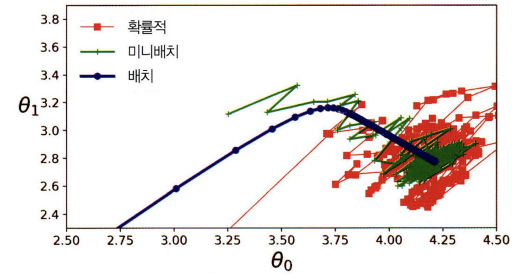

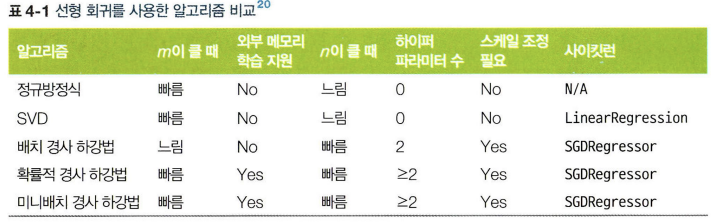

4.3 다항 회귀
---------------
데이터가 직선보다 복잡한 형태일 때 이용
- 각 특성의 거듭제곱을 새로운 특성으로 추가해서 훈련시키기

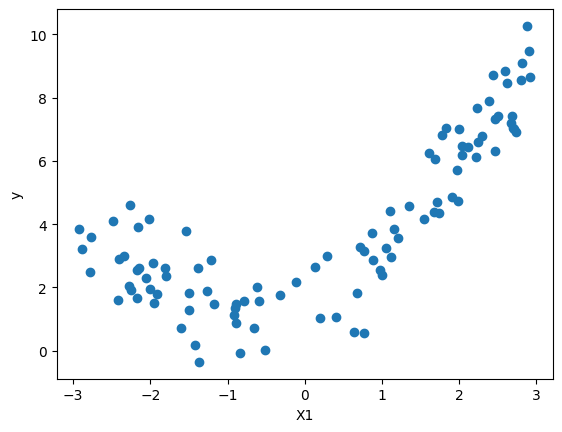

In [17]:
# 2차방정식으로 비선형 데이터 생성
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [18]:
# 사이킷런의 PolynomialFeatures 이용
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.17540686])

In [19]:
X_poly[0]

array([-2.17540686,  4.73239502])

In [20]:
# 확장된 훈련 데이터에 LinearRegression적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.72645277]), array([[0.89888434, 0.56890172]]))

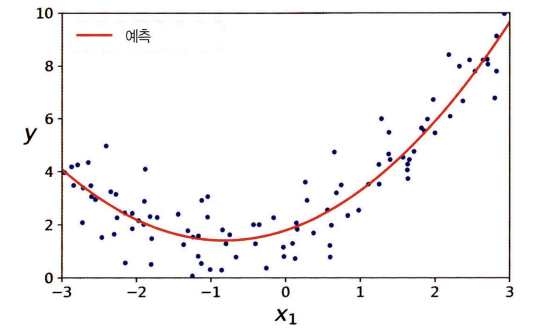

4.4 학습 곡선
------------------
고차 다항회귀 적용하면 더 훈련데이터랑 맞음

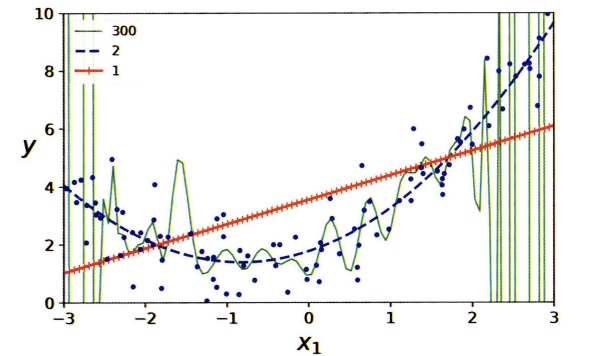

but 위와 같이 훈련데이터에 과적합될 수도 있음 (선형모델은 과소적합)

학습 곡선
- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기(or 훈련 반복)의 함수로 나타내는 그래프
- 단순히 훈련 세트에 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시키기

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# 주어진 훈련데이터에서 모델의 학습곡선 그리는 함수 정의
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
  plt.ylim([0, 3.0])
  plt.xlabel('Train Set Size')
  plt.ylabel('RMSE')
  plt.legend()

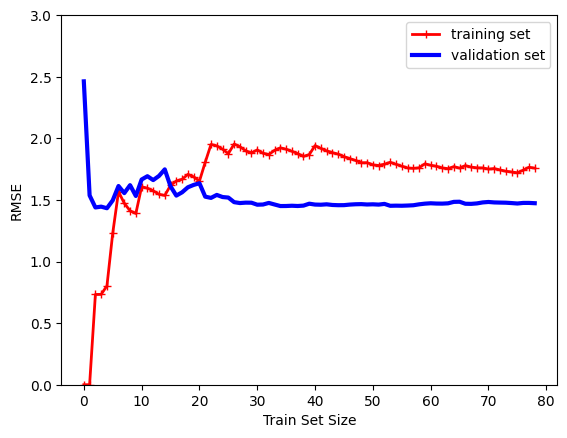

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

과소적합됨

훈련 데이터 성능을 보면 ...

- 샘플이 추가됨에 따라 잡음이 존재
- 비선형이기 때문에 모델이 훈련 데이터를 완벽히 학습하는 것이 불가능
- 곡선이 어느 정도 평편해질 때까지 오차가 계속 상승함

검증 데이터 성능을 보면 ...

- 모델이 적은 수의 훈련 샘플로 훈련될 때는 제대로 일반화될 수 없어서 검증 오차가 초기에 매우 큼
- 샘플이 추가됨에 따라 검증 오차가 감소

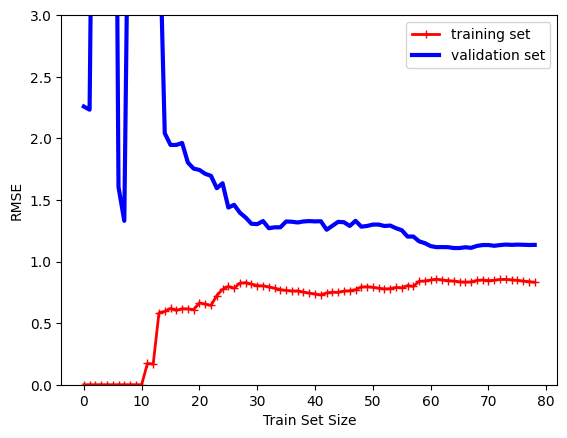

In [26]:
# 같은 데이터에서 10차 다항 회귀 모델의 학습 곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

이전과의 차이점
- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮음
- 두 직선 사이에 공간이 있음

=> 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낮다는 뜻

=> 과대적합 모델의 특징

4.5 규제가 있는 선형 모델
---------------------------
과대적합 감소하는 법 : 모델 규제하기
- 자유도 줄이기
- 다항식의 차수 감소시키기
- 모델의 가중치 제한하기 -> 릿지.라쏘.엘라스틱넷

4.5.1 릿지 회귀
----------------------
규제가 추가된 선형 회귀 버전

- 규제항이 비용 함수에 추가되며, 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 작게 유지되도록 노력함
- 규제항은 훈련하는 동안에만 비용 함수에 추가되며 훈련이 긑나면 모델의 성능을 규제가 없는 성능 지표로 평가함

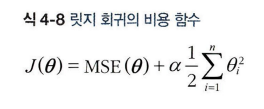

알파 : 모델을 얼마나 규제할지
- 0이면 릿지 회귀 = 선형 회귀
- 아주 크면 모든 가중치가 거의 0에 가까움 -> 데이터의 평균을 지나는 수평선이 됨


In [27]:
# 정규방정식을 사용해서 릿지 회귀 적용
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.25694504]])

In [28]:
# 확률적 경사 하강법을 사용하여 릿지 회귀
## penalty : 사용할 규제를 지정함
## l2 : SGE가 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하도록 함 (즉, 릿지 회귀)
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.245735])

4.5.2 라쏘 회귀
----------------------
선형 회귀의 다른 규제된 버전
- 릿지회귀와 달리 가중치 벡터의 l1 노름을 사용

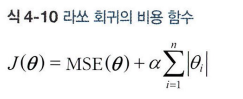

덜 중요한 특성의 가중치를 제거하려고 함
- 자동으로 특성 선택을 하고 희소 모델을 만든다. (0이 아닌 특성의 가중치가 적음)

- 라쏘를 사용할 때 경사하강법이 최적점 근처에서 진동하는 것을 막으려면 훈련하는 동안 점진적으로 학습률을 감소시켜야 함

- 라쏘의 비용함수는 theta=0에서 미분 불가능하지만, 서브그레디언트 벡터를 사용하면 경사하강법을 적용하는데 문제가 없다.

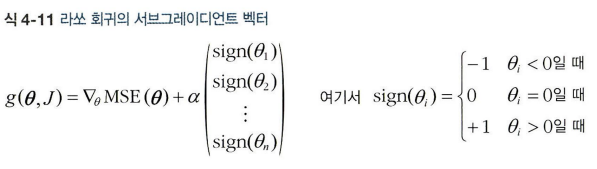

In [29]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) # 대신 SQDRegressor(penalty='l1') 사용 가능
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.22428601])

4.5.3 엘라스틱넷
------------------------
엘라스틱넷 = 릿지회귀 + 라쏘회귀
- 감마=0 -> 엘라스틱넷 = 릿지회귀
- 감마=1 -> 엘라스틱넷 = 라쏘회귀

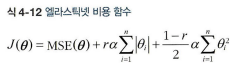

엘라스틱넷 사용하는 때
- 릿지가 기본인데 특성이 적게 있는 경우
- 평범한 선형회귀보다는 규제가 약간 있는 경우

=> 특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관되어 있을 때는 보통 라쏘가 문제를 일으키기 때문에 엘라스틱넷을 선호함

In [31]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.22412227])

4.5.4 조기 종료
-----------------
반복적인 학습 알고리즘을 규제하는 방식

검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
(훈련데이터 과대적합되기 전에 중지해야하니깐)

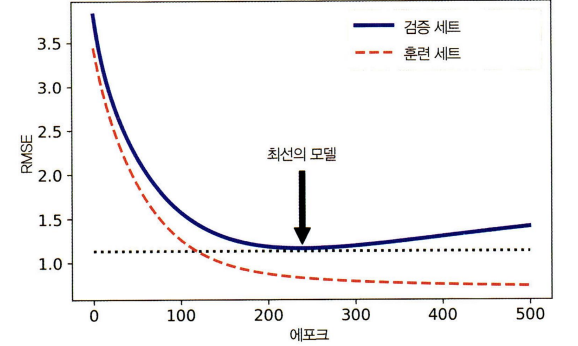

In [33]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start=True : fit()메서드가 호출될 때 이전 모델 파라미터에서부터 훈련 이어감
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

4.6 로지스틱 회귀
--------------------
샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용됨
- 이진분류기

4.6.1 확률 추정
------------------
- 입력 특성의 가중치합을 계산 + 편향 (선형회귀모델처럼)
- 결괏값의 로지스틱 출력 (선형회귀모델과는 달리)

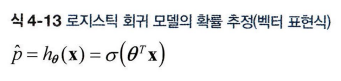


로지스틱 : 0~1 값 출력하는 시그모이드 함수

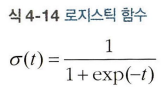

4.6.2 훈련과 비용 함수
----------------------------
로지스틱 회귀 모델의 훈련 목적
- 양성 샘플에 대해서는 높은 확률을 추정하고 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾기

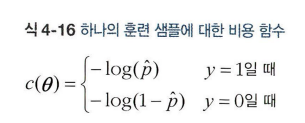

로그 손실 : 전체 훈련 세트에 대한 비용함수는 모든 훈련 샘플의 비용을 평균한 것

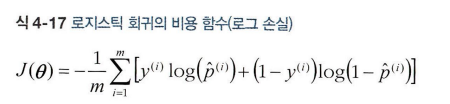

4.6.3 결정 경계
--------------------


In [34]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:,3:]   # 꽃잎의 너비
y = (iris["target"]==2).astype(np.int)   # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [35]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

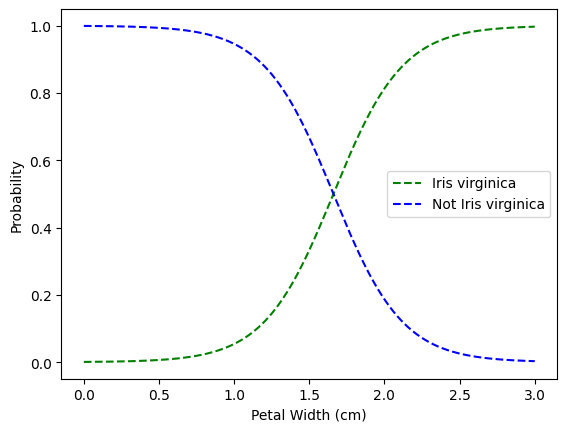

In [36]:
# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정 확률 계산
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g--", label="Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris virginica")
plt.legend()
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.show()

- 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어짐
- 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고 그보다 작으면 아니라고 예측할 것임

In [37]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

4.6.4 소프트맥스 회귀
-----------------------
다항 로지스틱 회귀라고도 불림

샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 k에 대한 점수 Sk(x)를 계산하고, 그 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정함

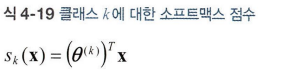

- 각 클래스는 자신만의 파라미터 벡터가 있으며, 이 벡터들은 파라미터 행렬에 행으로 저장됨
- 로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정확률이 가장 높은 클래스를 선택함
- 모델이 타깃 클래스에 대해 높은 확률을 추정하도록 만드는 것이 목적
- 크로스 엔트로피 비용 함수를 최소화하는 것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합함
- 사이킷런의 LogisticRegression은 클래스가 둘 이상일 때 기본적으로 일대다 전략을 사용

  - multi_class 매개변수를 'multinomial'로 바꾸면 소프트맥스 회귀 사용가능
  - 소프트맥스 회귀를 사용하려면 solver 매개변수에 'lbfgs'와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 함
  - 또한 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 l2 규제가 적용됨

In [38]:
X = iris["data"][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [39]:
softmax_reg.predict([[5,2]])

array([2])

In [40]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])